In [1]:
import os
import glob
import json
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

from matplotlib import patches
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
npix = 5
yy_s, yy_e = 2002, 2012
year_vector = np.arange(yy_s, yy_e+1)
years_num = yy_e - yy_s + 1
lon_min, lon_max, lat_min, lat_max = 10.5, 13.5, 44.5, 47

In [3]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Italy','Satellite')

In [4]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    VENETO = gpd.read_file(os.path.join(veneto_dir,'Veneto.geojson'))
    DEM = gpd.read_file(os.path.join(veneto_dir,'Veneto_DEM_500.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [5]:
products = ['CMORPH', 'ERA5', 'IMERG', 'PERSIANN', 'MSWEP', 'SM2RAIN']
time_reso = ['3h', '3h', '1dy', '1dy', '3h', '1dy']

In [10]:
Tr_pos = 2

for nn in range(len(products)):
    if nn == 5:
        filename = f'VENETO_DOWN_{products[nn]}_{time_reso[nn]}_2007_{yy_e}_npix_{npix}.nc'
    else:
        filename = f'VENETO_DOWN_{products[nn]}_{time_reso[nn]}_{yy_s}_{yy_e}_npix_{npix}.nc'
    print(f'Reading: {filename}')
    dir_data = os.path.join(dir_base,'3_DOWN',filename)

    DATA = xr.open_dataset(dir_data)
    lat = DATA.lat.values
    lon = DATA.lon.values
    Tr = DATA.Tr.values
    globals()[f"lon_{products[nn]}"], globals()[f"lat_{products[nn]}"] = np.meshgrid(lon, lat)
    globals()[f"{products[nn]}_{time_reso[nn]}_Q"]= DATA['Quantile'].values[Tr_pos,:,:]

Reading: VENETO_DOWN_CMORPH_3h_2002_2012_npix_5.nc
Reading: VENETO_DOWN_ERA5_3h_2002_2012_npix_5.nc
Reading: VENETO_DOWN_IMERG_1dy_2002_2012_npix_5.nc
Reading: VENETO_DOWN_PERSIANN_1dy_2002_2012_npix_5.nc
Reading: VENETO_DOWN_MSWEP_3h_2002_2012_npix_5.nc
Reading: VENETO_DOWN_SM2RAIN_1dy_2007_2012_npix_5.nc


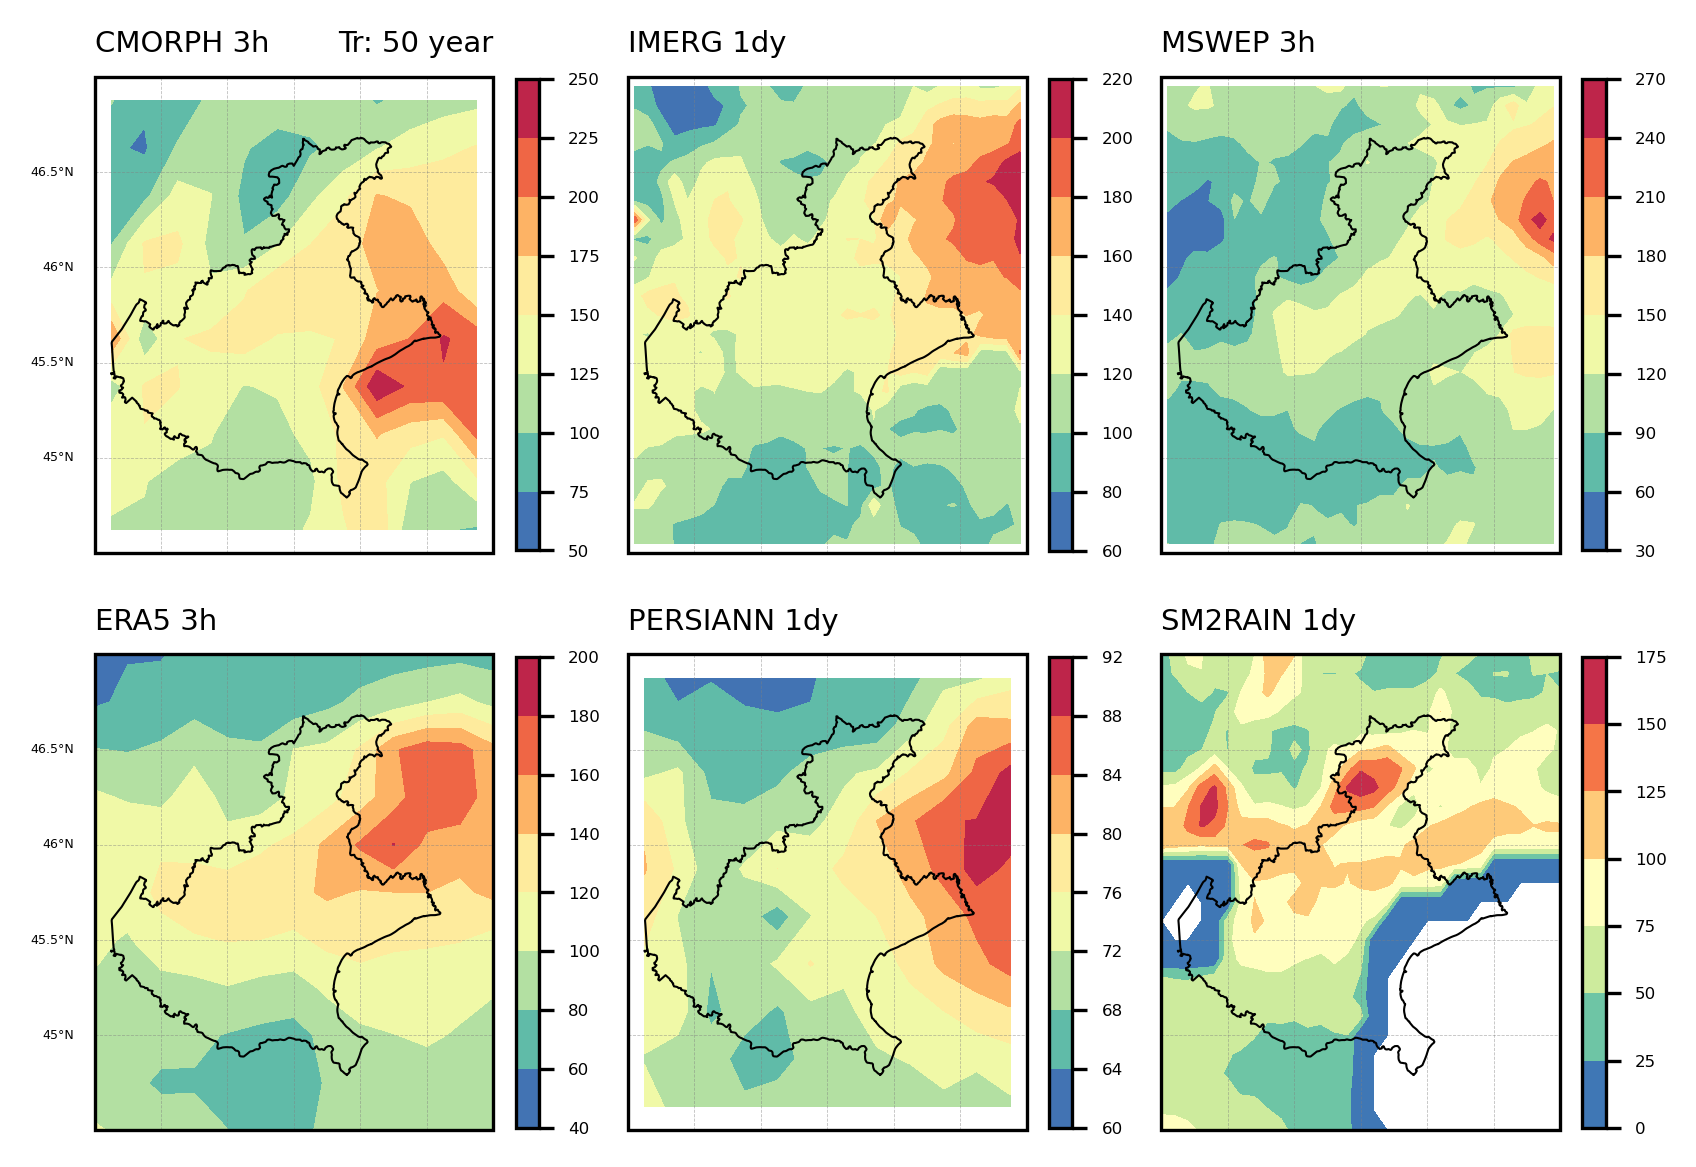

In [11]:
cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(6.5,5),dpi=300)
gs = gridspec.GridSpec(2,3)

# ==============================================================================
pos = 0
count = 1
for ncol in range(3):
    for nrow in range(2):
        ax_name = f"ax{count}"
        globals()[ax_name] = plt.subplot(gs[nrow, ncol], projection=proj)
        globals()[ax_name].set_extent([lon_min, lon_max, lat_min, lat_max], crs=proj)
        VENETO.plot(facecolor='None', ax=globals()[ax_name], linewidth=0.5, zorder=10)

        a1 = globals()[ax_name].contourf(globals()[f"lon_{products[pos]}"], globals()[f"lat_{products[pos]}"], globals()[f"{products[pos]}_{time_reso[pos]}_Q"], cmap=cmap)

        gl = globals()[ax_name].gridlines(crs=proj,draw_labels=False,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
        if ncol == 0:
            gl.left_labels = True
        else:
            gl.left_labels = False
        if nrow == 0:
            gl.bottom_labels = False
        else:
            gl.bottom_labels = True
        gl.xlabel_style = {'size': 4, 'color': 'k'}
        gl.ylabel_style = {'size': 4, 'color': 'k'}

        globals()[ax_name].set_title(f"{products[pos]} {time_reso[pos]}", fontsize=6, loc='left')
        cbar = plt.colorbar(a1, fraction=0.053)
        cbar.ax.tick_params(labelsize=4)

        count += 1
        pos += 1
# ==============================================================================

ax1.set_title(f'Tr: {Tr[Tr_pos]} year', fontsize=7, loc='right')

plt.subplots_adjust(wspace=0.2, hspace=0)
